In [1]:
#import library
import pandas as pd
import numpy as np

데이터에 대한 도메인 지식을 활용해 특징(Feature)를 만들어내는 과정
머신러닝 모델을 위한 데이터 테이블의 컬럼(특징)을 생성하거나 선택하는 작업으로 초기 데이터로부터
특징을 가공하고 생성하는 전체 과정

모델 성능에 영향이 큼.. 그 결과를 검토하고 개선, 선정하는 반복적인 과정

#특징 선택 : Feature Ranking or Importance
)분류 모델 중 Decision Tree의 경우 트리 상단에 있을수록 중요도가 높아 중요도를 매길 수 있음
)회귀 모델의 경우 forward selection/backward elimination과 같은 알고리즘을 통해 특징 선택

#차원감소 : Dimension Reduction 특징추출 extraction
관측데이터를 잘 설명할수 있는 잠재 공간(latent space)를 찾는 것
PCA가 대표적임 : 각 변수(Feature)를 하나의 축으로 투영시켰을 때 분산이 가장 큰 축을 PC1을 선택하고
        그 다음 큰 축들을 순차적으로 선택하고 데이터를 선형 변환하여 다차원을 축소하는 방법

**##특징생성 Feature Generation, construction > Feature Engineering
초기 주어진 데이터로부터 모델링 성능을 높이는 새로운 특성 생성
시간 데이터를 AM/PM으로 나누는 것이 예시
도메인에 대한 전문성과 경험에 따라 비용과 시간을 줄일 수 있는 부분.


In [2]:
df  =  pd.read_csv("C:\\Users\\82104\\Desktop\\dataset.csv",encoding='cp949')
df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0


In [3]:
df.dtypes

시군구           object
유형            object
지번            object
도로명           object
용도지역          object
건축물주용도        object
도로조건          object
전용/연면적(㎡)    float64
대지면적(㎡)      float64
거래금액(만원)      object
층            float64
계약년월           int64
계약일            int64
건축년도         float64
dtype: object

In [4]:
df_1 = df.copy()

# 1.1 변수 유형 파악 및 올바른 데이터 타입 설정

In [5]:
import datetime
import math

#1 계약년월, 계약일을 datatime으로 변환
contract_yr=[]
for i,j in np.array(df_1[['계약년월','계약일']]):
    contract_yr.append(datetime.datetime(i//100,i%100,j))
df_1['계약년월_adj']=contract_yr
df_1.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0,2017-08-23
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0,2017-08-29
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0,2017-09-04
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0,2017-09-14
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0,2017-09-27


In [6]:
#2-1 건축년도 nan값 처리 (Null 및 0인 값 제거)
df_1=df_1.dropna(subset=['건축년도']).reset_index()
df_1 = df_1[df_1['건축년도']>0].reset_index()

#2-2 datetime 형식으로 변환
built_yr=[]
for i in np.array(df_1[['건축년도']]):
    built_yr.append(datetime.datetime(int(i),1,1))
df_1['건축년도_adj']=built_yr
df_1=df_1.drop(['level_0','index'],axis=1)
df_1.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0,2017-08-23,1993-01-01
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0,2017-08-29,1987-01-01
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0,2017-09-14,1984-01-01
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01


In [7]:
#3 거래금액 string -> float 형변환
df_1['거래금액(만원)_adj'] = df_1['거래금액(만원)'].apply(lambda x: x.replace(",",""))
df_1['거래금액(만원)_adj'] = df_1['거래금액(만원)_adj'].apply(lambda x: float(x))
df_1.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0,2017-08-23,1993-01-01,550000.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0,2017-08-29,1987-01-01,390000.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0,2017-09-14,1984-01-01,60000.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0


# 1.2 Null value 처리

In [8]:
# 각 컬럼별로 null 값의 비율을 확인
for i in df_1.columns :
    X_i = df_1.loc[:,i].replace('-', np.nan) # 도로조건은 -가 null 값 (데이터를 출력하여 확인 필요)
    print("column {} : {} not null ratio".format(i,X_i.dropna().shape[0]/df.shape[0]))
    print(df_1.loc[:,i].unique())
    print("")
    print()

column 시군구 : 0.9820369501216026 not null ratio
['서울특별시강남구개포동' '서울특별시강남구논현동' '서울특별시강남구대치동' '서울특별시강남구도곡동' '서울특별시강남구삼성동'
 '서울특별시강남구세곡동' '서울특별시강남구수서동' '서울특별시강남구신사동' '서울특별시강남구압구정동' '서울특별시강남구역삼동'
 '서울특별시강남구일원동' '서울특별시강남구자곡동' '서울특별시강남구청담동' '서울특별시강동구강일동' '서울특별시강동구고덕동'
 '서울특별시강동구길동' '서울특별시강동구둔촌동' '서울특별시강동구명일동' '서울특별시강동구상일동' '서울특별시강동구성내동'
 '서울특별시강동구암사동' '서울특별시강동구천호동' '서울특별시강북구미아동' '서울특별시강북구번동' '서울특별시강북구수유동'
 '서울특별시강북구우이동' '서울특별시강서구가양동' '서울특별시강서구공항동' '서울특별시강서구내발산동' '서울특별시강서구등촌동'
 '서울특별시강서구마곡동' '서울특별시강서구방화동' '서울특별시강서구염창동' '서울특별시강서구화곡동' '서울특별시관악구남현동'
 '서울특별시관악구봉천동' '서울특별시관악구신림동' '서울특별시광진구광장동' '서울특별시광진구구의동' '서울특별시광진구군자동'
 '서울특별시광진구능동' '서울특별시광진구자양동' '서울특별시광진구중곡동' '서울특별시광진구화양동' '서울특별시구로구가리봉동'
 '서울특별시구로구개봉동' '서울특별시구로구고척동' '서울특별시구로구구로동' '서울특별시구로구궁동' '서울특별시구로구신도림동'
 '서울특별시구로구오류동' '서울특별시구로구온수동' '서울특별시구로구천왕동' '서울특별시구로구항동' '서울특별시금천구가산동'
 '서울특별시금천구독산동' '서울특별시금천구시흥동' '서울특별시노원구공릉동' '서울특별시노원구상계동' '서울특별시노원구월계동'
 '서울특별시노원구중계동' '서울특별시노원구하계동' '서울특별시도봉구도봉동' '서울특별시도봉구방학동' '서울특별시도봉구쌍문동'
 '서울특별시도봉구창동' '서울특별시동대문구답십리동' '

In [9]:
#1 대지면적의 not null 비율이 약 0.177로 대부분이 비어있어 사용하지 않는다.
df_1 = df_1.drop(['대지면적(㎡)'],axis=1)

In [10]:
#2-1 도로조건'은 비어있는 값들을 최빈값으로 대체
road = df_1['도로조건'].value_counts().index[0]
df_1['도로조건'] = df_1['도로조건'].fillna(road)
df_1['도로조건'] = df_1['도로조건'].replace('-',road) #도로조건에 의미없는 '-' 존재하여 제거

#2 '층'은 비어있는 값들을 최빈값으로 대체
#floor = df_1['층'].value_counts().index[0]
#df_1['층']=df_1['층'].fillna(floor)
#df_1.head()

In [11]:
# 2-2
# 층의 not-null 비율이 약 0.413으로 빈 값이 상당히 많고 최빈값인 1로 대체하기에는
# 전체 데이터 중 1층이 차지하는 비율이 30%에 불과하기 때문에 다른 feature들을 토대로 층 수를 예측한다.

In [12]:
#머신러닝으로 층 수를 예측해서 층수가 null값인 것들을 대체함
from sklearn.ensemble import RandomForestClassifier

def predict_floor(data):
    #층수가 Null인 것과 아닌것을 분류
    floor_null = data.loc[data['층'].isnull()]
    floor_notnull = data.loc[data['층'].notnull()]

    #층수를 예측할 Feature 선택
    wCol = ['전용/연면적(㎡)','거래금액(만원)_adj','건축년도']
    
    #층수가 Null이 아닌 데이터들의 타입을 str으로 바꿔줌
    floor_notnull['층'] = floor_notnull['층'].astype('str')
    
    #랜덤포레스트 분류기를 사용한다
    rfModel_floor = RandomForestClassifier()
    
    #wCol에 있는 Feature값을 바탕으로 풍속을 학습시킨다
    rfModel_floor.fit(floor_notnull[wCol], floor_notnull['층'])
    
    #학습한 값을 바탕으로 층수가 Null인 데이터의 층수를 예측한다.
    floor0Values = rfModel_floor.predict(X=floor_null[wCol])
    
    #값을 예측한 후 비교해보기 위해 예측값을 넣어 데이터프레임을 새로 만든다.
    predictfloornull = floor_null
    predictfloorNotnull = floor_notnull
    
    #값이 null으로 기록된 층에 대해 예측한 값을 넣어준다
    predictfloornull['층'] = floor0Values
    
    #floor_notnull null이 아닌 층이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다
    data = predictfloorNotnull.append(predictfloornull)
    
    #층수의 데이터타입을 float로 지정
    data['층'] = data['층'].astype('float')
    data.reset_index(inplace=True)
    data.drop('index',inplace=True,axis=1)
    
    return data

In [13]:
df_1 = predict_floor(df_1)

C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
df_1['층'].unique()

array([ 1., 11., 13.,  5.,  4., 30.,  2.,  8.,  9., 10.,  7., 12.,  3.,
       15., 25., 24., 32., 18.,  6., 14., 19., 16., 17., 20., 21., 22.,
       23., 26., 27., 28., 29., 34., 33., 35., 36., 31., 60., 50., 61.,
       70., 80., 51., 40., 41., 47., 42., 44., 43., 45., 90., 71., 81.,
       82., 62., 52., 72., 54., 46., 37., 91., 53., 63., 64.])

In [14]:
df_1['층'].value_counts()[1]/sum(df_1['층'].value_counts()) 
#최빈값이었던 1층을 전체 비율 대비 일정 수준을 유지하면서 균형있게 null값 처리

0.39329162321863054

In [15]:
#4 모든 feature에 null값이 존재하지 않음을 확인
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46032 entries, 0 to 46031
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   시군구           46032 non-null  object        
 1   유형            46032 non-null  object        
 2   지번            46032 non-null  object        
 3   도로명           46032 non-null  object        
 4   용도지역          46032 non-null  object        
 5   건축물주용도        46032 non-null  object        
 6   도로조건          46032 non-null  object        
 7   전용/연면적(㎡)     46032 non-null  float64       
 8   거래금액(만원)      46032 non-null  object        
 9   층             46032 non-null  float64       
 10  계약년월          46032 non-null  int64         
 11  계약일           46032 non-null  int64         
 12  건축년도          46032 non-null  float64       
 13  계약년월_adj      46032 non-null  datetime64[ns]
 14  건축년도_adj      46032 non-null  datetime64[ns]
 15  거래금액(만원)_adj  46032 non-null  float6

# 1.3 Outlier 처리

In [16]:
### Column이 한글이면 에러가 발생할 수 있으므로 영문으로 사용하는 것을 추천 (아래 코드는 한글 폰트 사용)
### 각 plot 함수는 dataframe과 columns을 인풋으로 받아서 변수의 그림 출력
### plotHistogram은 histogram, plotPairplot은 컬럼별 scatter plot, plotBoxplot은 기준 컬럼(범주형 변수)에 대한 box plot
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()
        
        
def plotPairplot(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    sns.pairplot(_df.loc[:,columns])
    plt.show()

        
def plotBoxplot(_df, basis_col1, y_col2):
    _unique = _df.loc[:, basis_col1].unique()
    if len(_unique) < 50:
        print("기준 컬럼의 종류가 너무 많습니다.(50개 이상)")
    
    box_plot=[]
    count_ = []
    for n,i in enumerate(_unique):
        box_plot.append(list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))
        count_.append(len((list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))))

    print('Count   ',count_)
    plt.boxplot(box_plot, flierprops=dict(markerfacecolor='g', marker='D'));
    plt.xticks(range(1,len(_unique)+1),_unique)

Count    [18104, 532, 480, 1889, 2466, 459, 8465, 677, 497, 940, 784, 308, 4855, 261, 27, 75, 73, 344, 1234, 279, 46, 122, 112, 380, 159, 126, 27, 26, 11, 11, 9, 12, 24, 17, 8, 141, 293, 239, 67, 401, 67, 53, 497, 148, 7, 11, 14, 11, 2, 78, 47, 12, 18, 20, 16, 17, 6, 1, 1, 3, 6, 14, 3]


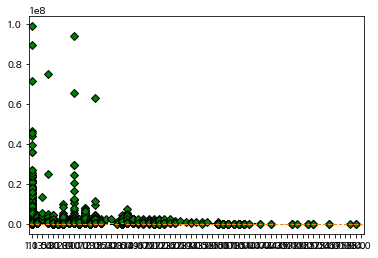

In [17]:
plotBoxplot(df_1, '층', '거래금액(만원)_adj')

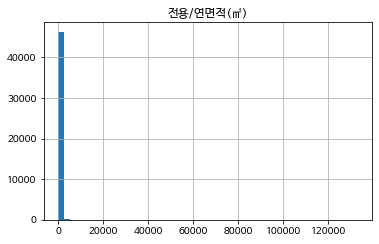

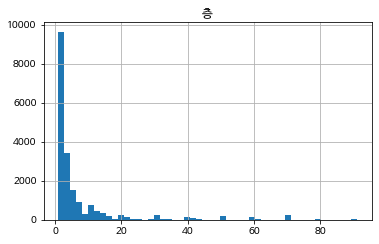

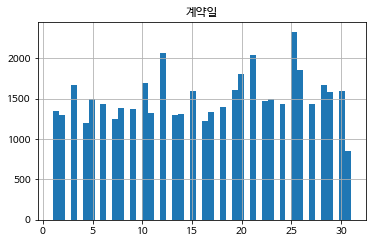

In [18]:
plotHistogram(df_1, ['전용/연면적(㎡)', '층', '계약일'])

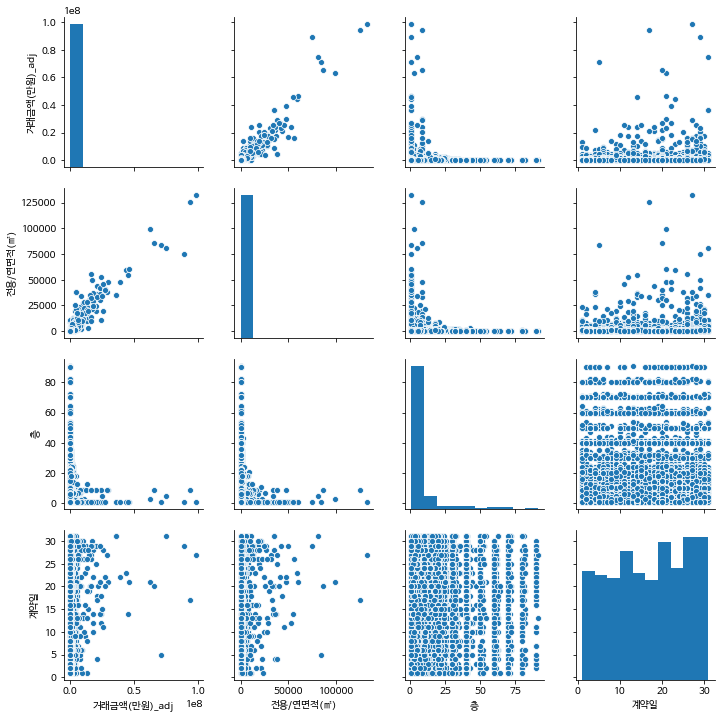

In [19]:
plotPairplot(df_1, ['거래금액(만원)_adj', '전용/연면적(㎡)', '층', '계약일'])

In [20]:
#################################################################################
# TODO: 합리적인 방법으로 이상치 값을 처리하고 산점도의 변화 확인               #
#                                                                               #
# 1. 1%의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거       #
#  (np.where 사용)
# 2. 도로조건 '-' 제거                                                          #
#################################################################################
df_2 = df_1.copy()
df_2.info()
# 위 df_2를 기반으로 작성할 것
# 층은 큰값 1% 제거, 건축년도는 작은값 1% 

#1 1%의 이상치 제거
df_2 = df_2.loc[np.where(df_2['층'] < df_2['층'].quantile(0.99))]
df_2.reset_index(drop=True, inplace= True)
df_2 = df_2.loc[np.where(df_2['건축년도'] > df_2['건축년도'].quantile(0.01))]
df_2.reset_index(drop=True, inplace= True)
df_2.info()

#2 도로조건 '-'는 앞서 이미 제거됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46032 entries, 0 to 46031
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   시군구           46032 non-null  object        
 1   유형            46032 non-null  object        
 2   지번            46032 non-null  object        
 3   도로명           46032 non-null  object        
 4   용도지역          46032 non-null  object        
 5   건축물주용도        46032 non-null  object        
 6   도로조건          46032 non-null  object        
 7   전용/연면적(㎡)     46032 non-null  float64       
 8   거래금액(만원)      46032 non-null  object        
 9   층             46032 non-null  float64       
 10  계약년월          46032 non-null  int64         
 11  계약일           46032 non-null  int64         
 12  건축년도          46032 non-null  float64       
 13  계약년월_adj      46032 non-null  datetime64[ns]
 14  건축년도_adj      46032 non-null  datetime64[ns]
 15  거래금액(만원)_adj  46032 non-null  float6

# 1.4 파생변수 생성

In [21]:
#################################################################################
# TODO: 예측의 유의미한 영향을 미칠 수 있는 파생변수 생성                       #
# - 건물가격을 바로 예측할 수 있지만, 평당가격을 예측하는 모델을 만들어 전용면적에
# 곱하여 사용하도록 모델 설계. (DataFrame.apply 사용)                                                                                
# 1. 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리
# 2. 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
# 3. 평당가격 변수 추가 
# 4. 그 외의 합리적인 새로운 파생변수 생성                                
#################################################################################
df_3 = df_1.copy()
# df_3를 사용하여 작성할 것

In [22]:
#1 지역구 단위의 행정구역 새로운 변수 '지역구' 생성
df_3['지역구'] = df_3['시군구'].apply(lambda x: x.replace(" ",""))
df_3['지역구'] = df_3['지역구'].apply(lambda x: x[5:])
df_3['지역구'] = df_3['지역구'].apply(lambda x: x.replace("구", "구 "))
df_3['지역구'] = df_3['지역구'].apply(lambda x: x.replace("구 로", "구로"))
area = []
for i in df_3['지역구']:
    area.append(i.split(" ")[0])
df_3['지역구'] = area
df_3['지역구'].unique()
df_3.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구
0,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0,강남구
1,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0,강남구
2,서울특별시강남구개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,34.30,"75,000",1.0,201709,29,1984.0,2017-09-29,1984-01-01,75000.0,강남구
3,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"19,100",11.0,201710,16,1997.0,2017-10-16,1997-01-01,19100.0,강남구
4,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"18,500",13.0,201710,18,1997.0,2017-10-18,1997-01-01,18500.0,강남구


In [23]:
#2 건물년식을 일단위로 하여 새로운 변수 '건물년식' 생성
df_3['건물년식'] = df_3.apply(lambda x: (x['계약년월_adj'] - x['건축년도_adj']).days, axis = 1)
df_3

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구,건물년식
0,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0,강남구,7551
1,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0,강남구,12688
2,서울특별시강남구개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,34.30,"75,000",1.0,201709,29,1984.0,2017-09-29,1984-01-01,75000.0,강남구,12325
3,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"19,100",11.0,201710,16,1997.0,2017-10-16,1997-01-01,19100.0,강남구,7593
4,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"18,500",13.0,201710,18,1997.0,2017-10-18,1997-01-01,18500.0,강남구,7595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,서울특별시 중랑구 중화동,일반,3**,봉화산로,제2종일반주거,제1종근린생활,25m미만,60.19,"17,000",5.0,202003,13,1987.0,2020-03-13,1987-01-01,17000.0,중랑구,12125
46028,서울특별시 중랑구 중화동,집합,3**,동일로129길,제2종일반주거,기타,25m미만,11.42,"4,000",1.0,202003,23,2005.0,2020-03-23,2005-01-01,4000.0,중랑구,5560
46029,서울특별시 중랑구 중화동,일반,3**,동일로,준주거,제1종근린생활,25m이상,676.04,"445,585",1.0,202005,29,1977.0,2020-05-29,1977-01-01,445585.0,중랑구,15854
46030,서울특별시 중랑구 중화동,일반,3**,중랑천로,제2종일반주거,숙박,25m미만,446.40,"217,000",6.0,202006,11,1983.0,2020-06-11,1983-01-01,217000.0,중랑구,13676


In [24]:
#3 평당가격 변수 추가
df_3['평당가격'] = df_3.apply(lambda x: x['거래금액(만원)_adj'] / (x['전용/연면적(㎡)'] * 0.3025) , axis = 1)
df_3.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구,건물년식,평당가격
0,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0,강남구,7551,7402.410000
1,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0,강남구,12688,5509.641873
2,서울특별시강남구개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,34.30,"75,000",1.0,201709,29,1984.0,2017-09-29,1984-01-01,75000.0,강남구,12325,7228.393128
3,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"19,100",11.0,201710,16,1997.0,2017-10-16,1997-01-01,19100.0,강남구,7593,1946.377801
4,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"18,500",13.0,201710,18,1997.0,2017-10-18,1997-01-01,18500.0,강남구,7595,1885.235043


# 1.5 Categorical 변수 처리

In [25]:
df_3.columns

Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
       '거래금액(만원)', '층', '계약년월', '계약일', '건축년도', '계약년월_adj', '건축년도_adj',
       '거래금액(만원)_adj', '지역구', '건물년식', '평당가격'],
      dtype='object')

In [26]:
df_3.dtypes

시군구                     object
유형                      object
지번                      object
도로명                     object
용도지역                    object
건축물주용도                  object
도로조건                    object
전용/연면적(㎡)              float64
거래금액(만원)                object
층                      float64
계약년월                     int64
계약일                      int64
건축년도                   float64
계약년월_adj        datetime64[ns]
건축년도_adj        datetime64[ns]
거래금액(만원)_adj           float64
지역구                     object
건물년식                     int64
평당가격                   float64
dtype: object

In [27]:
CATEGORICAL = ['유형','용도지역', '건축물주용도', '도로조건','지역구'] # '유형' 변수 추가했습니다.
df_4 = df_3.loc[:,[ '전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj']]

In [28]:
df_3[CATEGORICAL].head()

,유형,용도지역,건축물주용도,도로조건,지역구
0,집합,일반상업,판매,25m이상,강남구
1,집합,제3종일반주거,제1종근린생활,25m이상,강남구
2,집합,일반상업,제2종근린생활,12m미만,강남구
3,집합,일반상업,업무,25m이상,강남구
4,집합,일반상업,업무,25m이상,강남구


      count         mean          std
유형                                   
일반   8276.0  3207.518382  3231.891311
집합  37756.0  2813.867393  3085.742536
           count         mean          std
용도지역                                      
중심상업       637.0  6107.886602  4562.507255
일반주거         4.0  3772.743933  1460.287780
제1종전용주거     61.0  3599.532731  2621.561450
용도미지정       31.0  3525.020826  2118.591151
제3종일반주거   8496.0  3247.782738  3268.069068
일반상업     18921.0  3021.513469  3556.766604
근린상업       411.0  2880.510108  3276.702822
제1종일반주거    604.0  2760.427776  1992.292742
준주거       4340.0  2714.579905  2512.906438
유통상업       382.0  2499.226864  2014.148545
자연녹지        38.0  2470.298917  1962.391229
제2종일반주거   8547.0  2382.071935  2234.738828
개발제한구역      50.0  2282.518350  1833.862389
준공업       3500.0  2175.483158  1858.999251
제2종전용주거     10.0  1899.241345   837.578155
           count         mean          std
건축물주용도                                    
판매       11053.0  3223.774534  

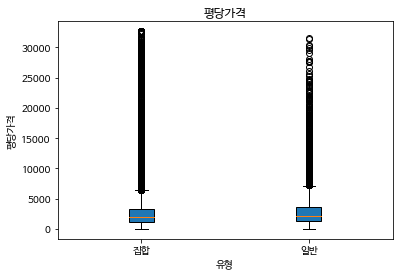

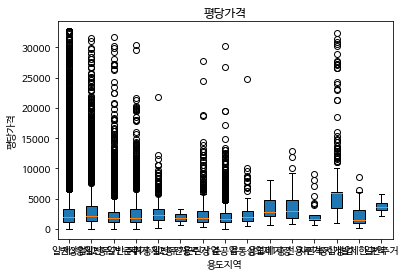

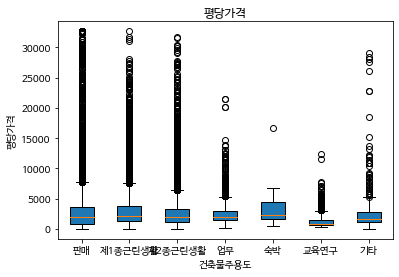

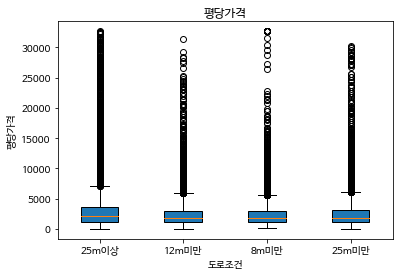

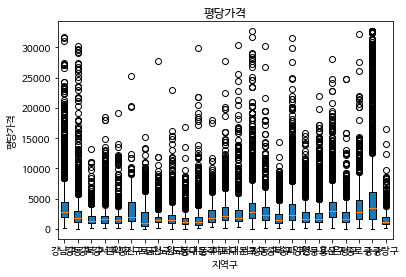

In [29]:
# 각 Category마다의 평당가격의 평균값, 분포를 확인하여 ordinal하게 변수를 정의해도 무방한지 참고 
for j in CATEGORICAL:
    price=[]
    for i in df_3[j].unique():
        price.append(df_3[df_3[j]==i]['평당가격'].values)
      
    fig, ax = plt.subplots()
    bp = ax.boxplot(price, patch_artist=True)
    ax.set_xticklabels(df_3[j].unique())
    ax.set_title('평당가격')
    ax.set_ylabel('평당가격')
    ax.set_xlabel(j)
    
    print(df_3.groupby(df_3[j])['평당가격'].describe()[['count','mean','std']].sort_values(by='mean',ascending=False))


In [30]:
#################################################################################
# TODO:범주형 변수 처리                                                         #
#                                                                               #
# 범주형 변수를 Onehot encoding (Pandas.get_dummies 사용)                       #
# 변수의 종류당 하나의 dimension이 생기므로 차원이 매우 커짐. 따라서 해결할 수  #
# 있는 여러 존재하는데, 의미를 해석하여 ordinal하게 변수를 정의하거나 차원을    #
# 축소하는 MCA 알고리즘 등이 존재
# Ordinal 예시 : '용도지역'의 경우 평당 가격이 
# 상업지역 > ... > 준주거 > ... > 개발제한구역 이므로 이를 오름차순의 값으로 설정
#################################################################################

In [31]:
# 지역구 변수 : Mean Target Encoding
# 지역구마다의 평당가격에 순위가 있을 것이라 통상적으로 생각할 수 있기 때문에 각 지역구마다의 평균가격으로 encoding
# 단순히 1,2,3..순위를 부여하는 것이 아닌 실제 Target간의 수치적인 관계를 반영할 수 있으나
# 대푯값만을 사용하기 때문에 trainset, testset의 분포가 다를 경우 오버피팅이 발생할 수 있어 이를 보완해야함.
df_3['지역구_mean'] = 0
for region in df_3['지역구'].unique():
    df_3['지역구_mean'][(df_3['지역구']== region)] = np.mean(df_3[df_3['지역구']==region]['평당가격'])
df_3.head(5)

C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구,건물년식,평당가격,지역구_mean
0,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0,강남구,7551,7402.410000,3967.971239
1,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0,강남구,12688,5509.641873,3967.971239
2,서울특별시강남구개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,34.30,"75,000",1.0,201709,29,1984.0,2017-09-29,1984-01-01,75000.0,강남구,12325,7228.393128,3967.971239
3,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"19,100",11.0,201710,16,1997.0,2017-10-16,1997-01-01,19100.0,강남구,7593,1946.377801,3967.971239
4,서울특별시강남구개포동,집합,1*,개포로,일반상업,업무,25m이상,32.44,"18,500",13.0,201710,18,1997.0,2017-10-18,1997-01-01,18500.0,강남구,7595,1885.235043,3967.971239


In [32]:
df_3['용도지역'].unique()

array(['일반상업', '제3종일반주거', '제2종일반주거', '준주거', '제1종일반주거', '제2종전용주거', '근린상업',
       '준공업', '유통상업', '용도미지정', '제1종전용주거', '자연녹지', '중심상업', '개발제한구역',
       '일반주거'], dtype=object)

In [33]:
# 용도지역 변수 : Ordinal
df_3['용도지역_rank'] = 0
for i in df_3['용도지역'].unique():
    df_3['용도지역_rank'][df_3['용도지역']==i] = np.mean(df_3[df_3['용도지역']==i]['평당가격'])
df_3['용도지역'].unique()

C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['일반상업', '제3종일반주거', '제2종일반주거', '준주거', '제1종일반주거', '제2종전용주거', '근린상업',
       '준공업', '유통상업', '용도미지정', '제1종전용주거', '자연녹지', '중심상업', '개발제한구역',
       '일반주거'], dtype=object)

In [34]:
df_3['용도지역_rank'] = df_3['용도지역_rank'].rank(ascending=False,method='dense')

In [35]:
df_3['용도지역_rank'].unique()

array([ 6.,  5., 12.,  9.,  8., 15.,  7., 14., 10.,  4.,  3., 11.,  1.,
       13.,  2.])

In [36]:
df_3.sample(5)

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,...,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,지역구,건물년식,평당가격,지역구_mean,용도지역_rank
17899,서울특별시 영등포구 여의도동,집합,4*,-,일반상업,업무,25m미만,115.47,"25,500",8.0,...,5,1981.0,2020-02-05,1981-01-01,25500.0,영등포구,14279,730.038284,2315.706112,6.0
6575,서울특별시 강남구 수서동,집합,7**,광평로56길,일반상업,업무,25m미만,39.79,"18,950",10.0,...,28,1997.0,2019-03-28,1997-01-01,18950.0,강남구,8121,1574.381204,3967.971239,6.0
42550,서울특별시 송파구 가락동,일반,2*,오금로36길,제2종일반주거,제2종근린생활,25m미만,1185.02,"434,000",17.0,...,5,2005.0,2019-12-05,2005-01-01,434000.0,송파구,5451,1210.705932,3380.207339,12.0
11890,서울특별시 은평구 응암동,집합,1**,응암로,준주거,제1종근린생활,25m이상,120.42,"50,500",1.0,...,6,1994.0,2018-09-06,1994-01-01,50500.0,은평구,9014,1386.332410,2213.645644,9.0
42646,서울특별시 송파구 문정동,집합,6**,새말로,유통상업,판매,25m이상,49.77,"23,000",2.0,...,21,2013.0,2019-10-21,2013-01-01,23000.0,송파구,2484,1527.688524,3380.207339,10.0


In [37]:
CATEGORICAL.remove('지역구')
CATEGORICAL.remove('용도지역')

In [38]:
CATEGORICAL

['유형', '건축물주용도', '도로조건']

In [39]:
#1 나머지 범주형 변수 Onehot encoding
onehot = pd.get_dummies(df_3[CATEGORICAL], drop_first=False)
onehot.shape
onehot

,유형_일반,유형_집합,건축물주용도_교육연구,건축물주용도_기타,건축물주용도_숙박,건축물주용도_업무,건축물주용도_제1종근린생활,건축물주용도_제2종근린생활,건축물주용도_판매,도로조건_12m미만,도로조건_25m미만,도로조건_25m이상,도로조건_8m미만
0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,1,0,0,0,0,0,1,0,0,0,1,0,0
46028,0,1,0,1,0,0,0,0,0,0,1,0,0
46029,1,0,0,0,0,0,1,0,0,0,0,1,0
46030,1,0,0,0,1,0,0,0,0,0,1,0,0


In [40]:
temp = df_3.drop(CATEGORICAL, axis=1)
df_4 = pd.concat([temp, onehot],axis=1)
df_4.columns

Index(['시군구', '지번', '도로명', '용도지역', '전용/연면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일',
       '건축년도', '계약년월_adj', '건축년도_adj', '거래금액(만원)_adj', '지역구', '건물년식', '평당가격',
       '지역구_mean', '용도지역_rank', '유형_일반', '유형_집합', '건축물주용도_교육연구', '건축물주용도_기타',
       '건축물주용도_숙박', '건축물주용도_업무', '건축물주용도_제1종근린생활', '건축물주용도_제2종근린생활',
       '건축물주용도_판매', '도로조건_12m미만', '도로조건_25m미만', '도로조건_25m이상', '도로조건_8m미만'],
      dtype='object')

In [41]:
df_4.to_csv('C:\\Users\\82104\\Desktop\\4-2수업자료\\응용데이터애널리틱스\\df_4_Final.csv',index=False,encoding='cp949')

In [42]:
# MCA (Multiple Correspondence Analysis)
# 3개 이상 변수들의 복합적인 교차빈도분할표를 이용해 분석하는 방법
# 다양한 변수들을 조합해 각각의 위치를 확인하여 직관적인 해석이 가능

"""

!pip install prince #prince module 다운받을 때 사용
import prince # for multiple correspondence analysis
 
input_X = df_3[CATEGORICAL] 
mca = prince.MCA(n_components=2).fit(input_X) #주성분 2개로 지정, MCA모델 fitting
mca_comp2 = mca.column_coordinates(input_X) #onehot encoding된feature들의 mca1,mca2에 대한 weight값들 확인 

"""


"""
# 상응분석을 통해 데이터 보존력을 확인
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 폰트 세팅
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# 시각화
ax = mca_comp2.plot_coordinates(X = input_X,ax=None, figsize=(10, 10), show_column_labels=True)
ax.set_title("상응분석", fontsize = 24)

"""


"""

mca_rs = np.dot(onehot,mca_comp2) # 각각의 Case(46032개)에 대해 mca1, mca2 값 계산
df_mca_rs = pd.DataFrame(mca_rs,columns=['mca1','mca2'])

df_4 = df_temp.drop(CATEGORICAL, axis=1)
df_4 = pd.concat([df_4, df_mca_rs],axis=1)
df_4.head() #최종 df_4 

"""

# 지역구, 용도지역 외 3가지 Category변수들을 Onehot encoding을 한 후 이것을 MCA 알고리즘으로 축소했을 때에
# 데이터 보존력이 mca1(16.08%), mca2(11.01%)로 상당히 낮은 수치를 나타내어 데이터 소실이 많음을 확인하였고 
# Component를 증가시켜도 크게 개선되지 않았고 Validation MSE값도 상대적으로 크게 나왔습니다.
# 따라서 onehot encoding된 결과값을 그대로 df_4로 활용하기로 결정하였습니다.

# Category 변수를 처리하기 위해 시행했던 추가 trials
# 1) All 5 CATEGORICAL Variables -> Onehot encoding -> MCA(n_comp=2) : (보존력 4.53%+3.46%)로 상당히 취약
# 2) 지역구 Mean Target Encoding & Onehot encoding -> MCA(n_comp=2) : (보존력 8.37%+5.70%)로 취약
# 3) 지역구 Mean Target Encoding & Onehot encoding -> Validation MSE가 상당히 크게 나옴.



"\n\nmca_rs = np.dot(onehot,mca_comp2) # 각각의 Case(46032개)에 대해 mca1, mca2 값 계산\ndf_mca_rs = pd.DataFrame(mca_rs,columns=['mca1','mca2'])\n\ndf_4 = df_temp.drop(CATEGORICAL, axis=1)\ndf_4 = pd.concat([df_4, df_mca_rs],axis=1)\ndf_4.head() #최종 df_4 \n\n"